<a href="https://colab.research.google.com/github/Asmakhan88/Blood-Donation-Trends-Analysis/blob/main/Blood_Donation_Trends_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# New Section

In [8]:
!wget https://raw.githubusercontent.com/An709/Blood-Transfusion/main/Blood_Transfusion.csv -O transfusion.csv

--2025-08-22 15:06:33--  https://raw.githubusercontent.com/An709/Blood-Transfusion/main/Blood_Transfusion.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12843 (13K) [text/plain]
Saving to: ‘transfusion.csv’

transfusion.csv     100%[===================>]  12.54K  --.-KB/s    in 0.001s  

2025-08-22 15:06:33 (12.8 MB/s) - ‘transfusion.csv’ saved [12843/12843]



In [9]:
import pandas as pd

df = pd.read_csv("transfusion.csv")
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [11]:
df.columns = df.columns.str.strip().str.lower()


In [12]:
df.head()

,recency (months),frequency (times),monetary (c.c. blood),time (months),whether he/she donated blood in march 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [13]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   recency (months)                            748 non-null    int64
 1   frequency (times)                           748 non-null    int64
 2   monetary (c.c. blood)                       748 non-null    int64
 3   time (months)                               748 non-null    int64
 4   whether he/she donated blood in march 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


,recency (months),frequency (times),monetary (c.c. blood),time (months),whether he/she donated blood in march 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


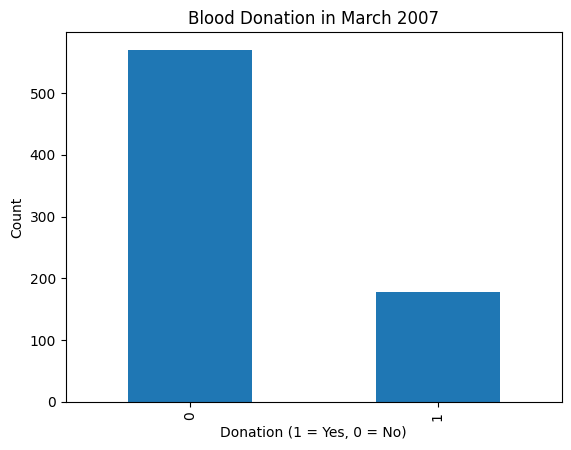

In [14]:
df['whether he/she donated blood in march 2007'].value_counts().plot(kind='bar')
plt.title("Blood Donation in March 2007")
plt.xlabel("Donation (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop("whether he/she donated blood in march 2007", axis=1)
y = df["whether he/she donated blood in march 2007"]


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [22]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("\n--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


--- Logistic Regression ---
Accuracy: 0.7666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.97      0.86       114
           1       0.57      0.11      0.19        36

    accuracy                           0.77       150
   macro avg       0.67      0.54      0.52       150
weighted avg       0.73      0.77      0.70       150

Confusion Matrix:
 [[111   3]
 [ 32   4]]


In [23]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n--- Random Forest ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



--- Random Forest ---
Accuracy: 0.7466666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       114
           1       0.47      0.39      0.42        36

    accuracy                           0.75       150
   macro avg       0.64      0.62      0.63       150
weighted avg       0.73      0.75      0.74       150

Confusion Matrix:
 [[98 16]
 [22 14]]


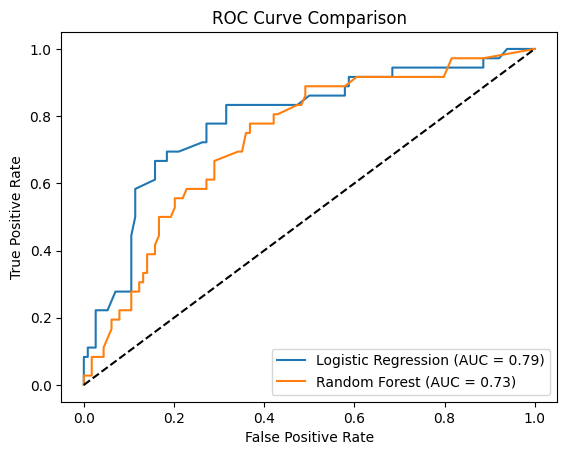

In [24]:
y_prob_log = log_reg.predict_proba(X_test)[:,1]
y_prob_rf = rf.predict_proba(X_test)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.plot(fpr_log, tpr_log, label="Logistic Regression (AUC = {:.2f})".format(auc(fpr_log, tpr_log)))
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = {:.2f})".format(auc(fpr_rf, tpr_rf)))
plt.plot([0,1],[0,1],'k--')  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()
